<a href="https://colab.research.google.com/github/shelvasha/Notebooks/blob/main/Modeling_Predicting_a_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context
* According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
* This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

###Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

In [2]:
# Import packages - TensorFlow, pandas and mathplotlib
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
stroke = pd.read_csv('https://raw.githubusercontent.com/shelvasha/Notebooks/main/Datasets/healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### EDA: profiling the data

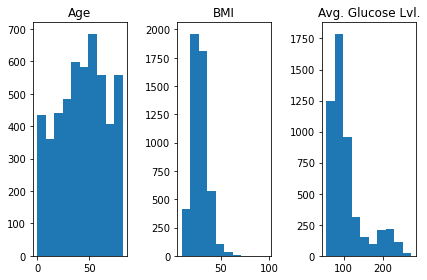

In [4]:
fig, ((p1),(p2),(p3)) = plt.subplots(1,3)

p1.hist(stroke['age'])
p1.set_title('Age')

p2.hist(stroke['bmi'])
p2.set_title('BMI')

p3.hist(stroke['avg_glucose_level'])
p3.set_title('Avg. Glucose Lvl.')

fig.tight_layout()
plt.show()

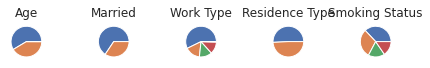

In [84]:
fig, ((p1),(p2),(p3), (p4), (p5)) = plt.subplots(1,5)

p1.pie(stroke['gender'].value_counts())
p1.set_title('Age')

p2.pie(stroke['ever_married'].value_counts())
p2.set_title('Married')

p3.pie(stroke['work_type'].value_counts())
p3.set_title('Work Type')

p4.pie(stroke['Residence_type'].value_counts())
p4.set_title('Residence Type')

p5.pie(stroke['smoking_status'].value_counts())
p5.set_title('Smoking Status')

fig.tight_layout()
plt.show()

In [6]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Remove NaNs

In [7]:
stroke_dropna = stroke.dropna()
stroke_dropna.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### The data has five attributes that need to be encoded:

* gender
* ever_married
* work_type
* Residence_type
* smoking_status

#### For this, we can use pd.get_dummies or scikitLearn:

In [8]:
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
stroke_dropna_encoded = pd.get_dummies(stroke_dropna, columns=categorical_cols)
stroke_dropna_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


### Normalization

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age","avg_glucose_level","bmi"]),
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols) # As a bonus, we can one-hot encode here as well                       
)

### The model

31/31 [==============================] - 0s 957us/step - loss: 0.0554 - mae: 0.0554


Text(0.5, 0, 'epoch')

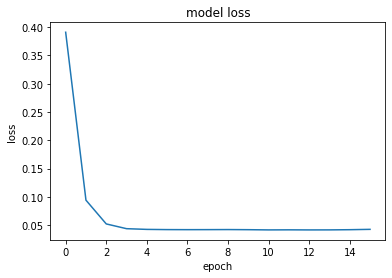

In [75]:
# Create
tf.random.set_seed(42)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss="mae", optimizer="Adam", metrics="mae")

# Fit
callback=tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)
history = model.fit(X_train_normal, y_train, epochs=250, callbacks=callback, verbose=0)

# Evaluate
model.evaluate(X_test_normal, y_test)

# Plot Model History
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [61]:
# Looking at the transformed data
print(X_train.shape)
print(X_train_normal.shape)

(3927, 11)
(3927, 19)


In [56]:
# Build training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization with MinMaxscalar
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [55]:
# Create X & y
X = stroke_dropna.drop("stroke", axis=1)
y = stroke_dropna["stroke"]

## Visualization

In [10]:
import plotly.express as px

In [83]:
had_stroke = stroke['stroke'] != 0
font = 'Graphik'
fig = px.scatter(stroke[had_stroke], x='avg_glucose_level', y='age', color='avg_glucose_level', title="<b>Average Glucose Level vs Age</b>", labels={"avg_glucose_level": "Glucose"})
fig.update_yaxes(title="Age", showgrid=False, title_font_family=font)
fig.update_xaxes(title="Average Glucose Level", showgrid=False, title_font_family=font)
fig.update_layout(font_family=font)

In [81]:
# Violin Plots in Plotly

fig = px.violin(stroke[had_stroke], x='heart_disease', y='avg_glucose_level',
                color='heart_disease',
                title="<b>Heart Disease & Average Glucose Level</b>",
                labels={"avg_glucose_level": "Glucose"},
                box=True,
                points="all",
                hover_data=stroke[had_stroke].columns)

fig.update_yaxes(title="Glucose", showgrid=False, title_font_family=font)
fig.update_xaxes(title="Heart Disease", showgrid=False, title_font_family=font)
fig.update_layout(font_family=font)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Heart Disease')

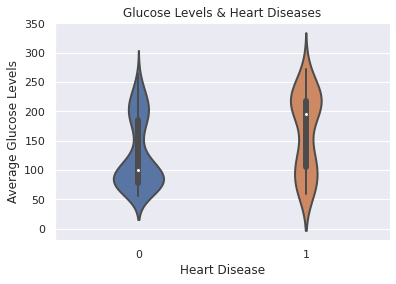

In [72]:
# Violin Plots in Seaboard
import seaborn as sns

sns.set(font="Graphik")

plot = sns.violinplot(stroke[had_stroke]['heart_disease'] , y=stroke[had_stroke]['avg_glucose_level'], linewidth=2, width=0.3)
plot.set_title('Glucose Levels & Heart Diseases')
plot.set_ylabel("Average Glucose Levels")
plot.set_xlabel("Heart Disease")
